IF you were to invest in 5 companies who had IPOS in 2019 would you want to know the risk of those companies? Calculate the volatility between 5 companies who IPOs occurred in 2019. Also do a brief risk analysis of each company in the portfolio. We will assume the follwing companies were invested in and that the portfolio is equally weighted

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt

Uber, Beyond Meat, LYFT, Pinterst, ZOOM

In [3]:
tickers = ["UBER", "ZM", "PINS", "BYND", "LYFT"]
data_frame = pd.DataFrame()
for t in tickers:
    data_frame[t] = web.DataReader(t, data_source = "yahoo", start = "2019-1-1")["Adj Close"]

In [24]:
data_frame.tail()

,UBER,ZM,PINS,BYND,LYFT
Date,,,,,
2019-11-20,28.030001,70.989998,19.400000,78.120003,43.950001
2019-11-21,29.459999,69.919998,19.070000,78.620003,46.759998
2019-11-22,29.559999,73.160004,18.650000,77.339996,46.459999
2019-11-25,29.110001,74.550003,18.950001,77.279999,48.939999
2019-11-26,30.065701,75.209999,19.094999,78.610001,49.220001


In [49]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140 entries, 2019-05-10 to 2019-11-26
Data columns (total 5 columns):
UBER    140 non-null float64
ZM      140 non-null float64
PINS    140 non-null float64
BYND    140 non-null float64
LYFT    140 non-null float64
dtypes: float64(5)
memory usage: 6.6 KB


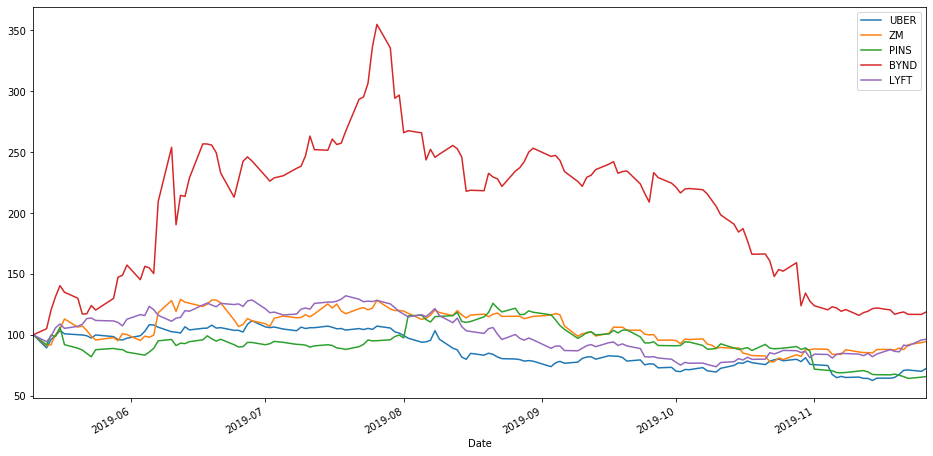

In [50]:
#lets see the behavior of the stocks so far by normalizing the data 
(data_frame/data_frame.iloc[0] * 100).plot(figsize = (16,8))
plt.show()

calculate the returns for the securties in the portfolio

In [51]:
simple_returns = (data_frame/data_frame.shift(1)) - 1

In [52]:
simple_returns

,UBER,ZM,PINS,BYND,LYFT
Date,,,,,
2019-05-10,NaN,NaN,NaN,NaN,NaN
2019-05-13,-0.107529,-0.089037,-0.083305,0.049532,-0.057545
2019-05-14,0.077089,0.008271,0.088622,0.146475,0.049221
2019-05-15,0.033283,0.090511,-0.012418,0.090863,0.069675
2019-05-16,0.041414,0.045637,0.077890,0.069029,0.028867
...,...,...,...,...,...
2019-11-20,0.036229,0.019385,-0.014228,0.009955,-0.004530
2019-11-21,0.051017,-0.015073,-0.017010,0.006400,0.063936
2019-11-22,0.003394,0.046339,-0.022024,-0.016281,-0.006416


In [66]:
simple_returns.in

DatetimeIndex(['2019-05-10', '2019-05-13', '2019-05-14', '2019-05-15',
               '2019-05-16', '2019-05-17', '2019-05-20', '2019-05-21',
               '2019-05-22', '2019-05-23',
               ...
               '2019-11-13', '2019-11-14', '2019-11-15', '2019-11-18',
               '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22',
               '2019-11-25', '2019-11-26'],
              dtype='datetime64[ns]', name='Date', length=140, freq=None)

In [53]:
simple_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140 entries, 2019-05-10 to 2019-11-26
Data columns (total 5 columns):
UBER    139 non-null float64
ZM      139 non-null float64
PINS    139 non-null float64
BYND    139 non-null float64
LYFT    139 non-null float64
dtypes: float64(5)
memory usage: 6.6 KB


In [54]:
simple_returns.tail() * 100

,UBER,ZM,PINS,BYND,LYFT
Date,,,,,
2019-11-20,3.622926,1.938539,-1.422768,0.995481,-0.453003
2019-11-21,5.101671,-1.507254,-1.701031,0.640041,6.393623
2019-11-22,0.339445,4.633875,-2.202413,-1.628093,-0.641572
2019-11-25,-1.522324,1.899944,1.608585,-0.077576,5.337924
2019-11-26,3.283064,0.885307,0.765164,1.721017,0.572134


Calculate the Risk for each security in the portfolio

In [74]:
uber_risk = simple_returns["UBER"].var()
uber_risk ** 0.5  * 100

3.0475371558534006

In [56]:
var_uber = simple_returns["UBER"].var() * 140
var_uber ** 0.5

0.36058945911978413

In [57]:
pinterest_Risk = simple_returns["PINS"].std() * 140 ** 0.5
pinterest_Risk

0.44059000500367923

In [58]:
beyond_risk = simple_returns["BYND"].std() * 140 ** 0.5
beyond_risk

0.7993084044998773

In [59]:
lyft_risk = simple_returns["LYFT"].std() * 140 ** 0.5
lyft_risk

0.34918616409393244

WE will calculate the overall risk of the portfolio assuming the portfoliio is equally weighted

In [60]:
weights = np.array([0.20,0.20,0.20,0.20,0.20])
portfolio_variance = np.dot(weights.T, np.dot(simple_returns.cov() * 140, weights))
portfolio_variance

0.09794886248191051

In [61]:
portfolio_volatility = np.dot(weights.T, np.dot(simple_returns.cov() * 140, weights)) ** 0.5
portfolio_volatility

0.3129678297875207

In [62]:
vol_percentage = (str(round(portfolio_volatility,2) * 100) + "%")

In [63]:
print(f"the overll volitility of the portfolio is {vol_percentage}")

the overll volitility of the portfolio is 31.0%


In [75]:
ticc = ["SDS", "SSO"]
framee = pd.DataFrame()
for tt in ticc:
    framee[tt] = web.DataReader(tt, data_source = "yahoo", start = "2019-05-26")["Adj Close"]

In [76]:
framee

,SDS,SSO
Date,,
2019-05-28,33.723961,114.469437
2019-05-29,34.179829,112.992546
2019-05-30,34.031174,113.481514
2019-05-31,34.923084,110.447891
2019-06-03,35.160923,109.829185
...,...,...
2019-11-20,26.969999,140.020004
2019-11-21,27.040001,139.559998
2019-11-22,26.930000,140.130005


In [77]:
#calulting expected returns 
expectedReturn = .05
newWeights = np.array([1.0, 0.0])
PortexpectedReturn = (newWeights[0] * expectedReturn) + (newWeights[1] * expectedReturn)

In [79]:
PortexpectedReturn * 100

5.0

In [80]:
rate_ofChange = (framee/framee.shift(1)) - 1

In [83]:
port_vol = np.dot(newWeights.T, np.dot(rate_ofChange.cov() * 140, newWeights)) ** 0.5

In [84]:
port_vol

0.19335242871159505